<h1>Big cat classifier</h1>
<p>Train a convolutional neural network to classify jaguars, lions, and tigers.</p>

<h2>Part I: Data preprocessing</h2>
<p>To help the network learn to identify images of cats in different positions/poses, we use a technique called Image augmentation. This will generate new images which are rotated, sheared, and zoomed into. By training on a wide variety of images, the performance will be improved</p>

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/dareimamlawal/miniconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

<p>Now we resize the images for training set to be 64x64</p>

In [3]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1917 images belonging to 3 classes.


Now we resize the test images as well

In [4]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 477 images belonging to 3 classes.


<h2>Part II: Defining the model architecture</h2>

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

The neural network is made up of 2 convolution and pooling layers connected to 128 node hidden layer which is finally connected to an output layer

In [6]:
# Initialising the CNN
classifier = Sequential()

#Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional and pooling layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Flattening
classifier.add(Flatten())

#128 fully connected
classifier.add(Dense(units = 128, activation = 'relu'))

#Output layer
classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Now we train the neural network for 5 epochs.

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 1917,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 477)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1917/1917 [==============================] - 1386s 723ms/step - loss: 0.3173 - accuracy: 0.8593 - val_loss: 0.5608 - val_accuracy: 0.7694
Epoch 2/5
1917/1917 [==============================] - 1289s 672ms/step - loss: 0.0796 - accuracy: 0.9720 - val_loss: 2.7496 - val_accuracy: 0.7997
Epoch 3/5
1917/1917 [==============================] - 1438s 750ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.9801 - val_accuracy: 0.7832
Epoch 4/5
1917/1917 [==============================] - 1225s 639ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.8044 - val_accuracy: 0.8083
Epoch 5/5
1917/1917 [==============================] - 1195s 623ms/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 1.0314 - val_accuracy: 0.8044


Let's save the model so we can use it in future.

In [8]:
classifier.save('cat_classifier.h5')

<h1>Part II: Testing model</h1>
<p>To load in the model</p>

In [9]:
from keras.models import load_model

In [10]:
cnn = load_model('cat_classifier.h5')

Below I define a function which takes in a new image, resizes it, and then makes a prediction.

In [12]:
import skimage.io as io
import skimage.transform as tr
import numpy as np
def predict_class(image):
    # resize image
    img = io.imread(image)         # Reads the image
    img = tr.resize(img, (64, 64, 3))  # Resizes the image
    img = img[np.newaxis, ...]         # Adds a new dim to simulate a batch
    prediction = cnn.predict(img)     # Predicts a value between 0 and 1    
    index_max = np.argmax(prediction)
    cats = {0: 'Jaguar', 1: 'Lion', 2: 'Tiger'}
    return cats[index_max], prediction

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

Let's test on an image of a lion

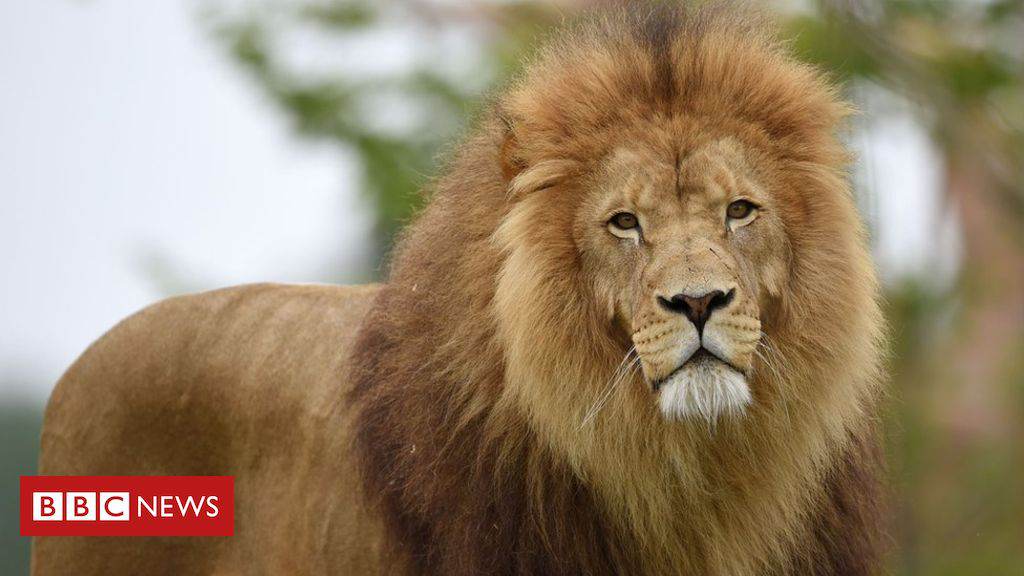

In [21]:
image = Image.open('test_lion.jpg')
display(image)

In [13]:
cat, pred = predict_class('test_lion.jpg')

In [14]:
print(cat)

Lion


We can see that the image is correctly classified! Below is a plot of the predictions.

In [42]:
def plot_prediction(pred):
    cats = ['jaguar', 'lion', 'tiger']
    plt.bar(cats, [pred[0][0],pred[0][1],pred[0][2]], color='green', width = 0.4)
    plt.show()

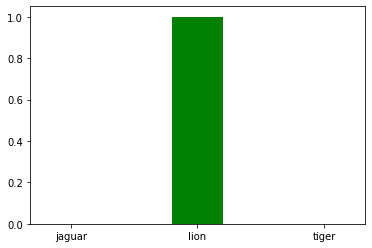

In [67]:
plot_prediction(pred)

Next, let's test an image of a jaguar

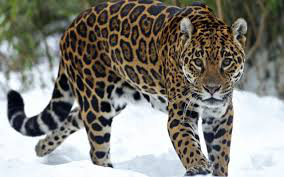

In [48]:
image2 = Image.open('test_jaguar.jpeg')
display(image2)

In [49]:
cat2, pred2 = predict_class('test_jaguar.jpeg')

In [50]:
cat2

'Jaguar'

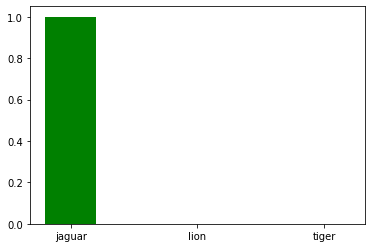

In [51]:
plot_prediction(pred2)

This image is also correctly classified! Now let's check a tiger...

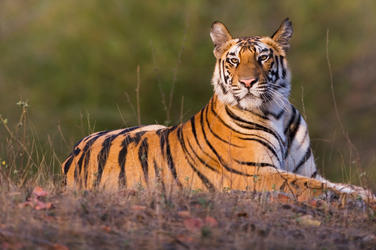

In [55]:
image3 = Image.open('test_tiger.jpg')
display(image3)

In [56]:
cat3, pred3 = predict_class('test_tiger.jpg')

In [57]:
cat3

'Tiger'

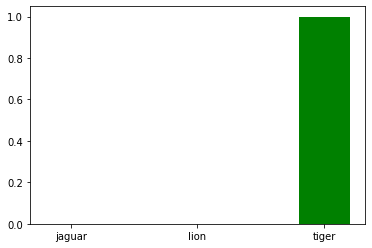

In [58]:
plot_prediction(pred3)

Again that was correctly classified. Let's make things interesting by testing an image of a Liger.

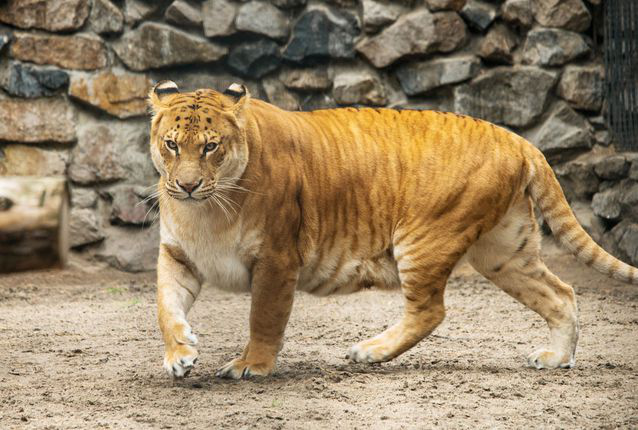

In [59]:
image4 = Image.open('test_liger.jpg')
display(image4)

In [60]:
cat4, pred4 = predict_class('test_liger.jpg')

In [61]:
cat4

'Lion'

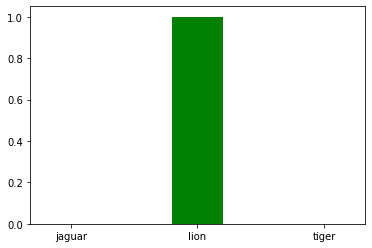

In [62]:
plot_prediction(pred4)

The liger looked a bit more Tiger than Lion in my opinion, and I'm a bit surprised the prediction plot doesn't have a higher score for tiger. Let's try on another Liger.

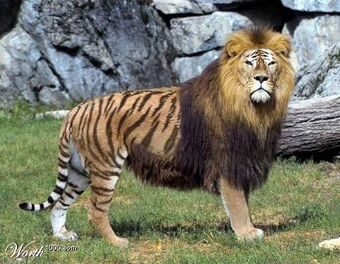

In [63]:
image4 = Image.open('test_liger2.jpg')
display(image4)

In [64]:
cat5, pred5 = predict_class('test_liger2.jpg')

In [65]:
cat5

'Lion'

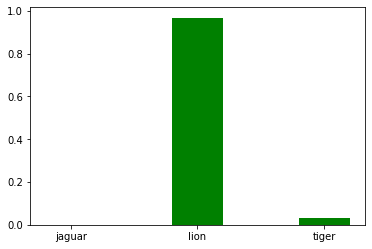

In [66]:
plot_prediction(pred5)

Here we can clearly see there is some confusion which is reasurring. Considering the picture looks more like a Lion with tiger stripes painted on than an actual Liger, I think the classifier is doing a reasonable job.

<h1>Future Work</h1>
<p>In the future I would like to train the classifier on a gpu using a larger data set. I also plan to build an interactive web app so that people can test the classifier without having to download the notebook. </p>